[0.7021739130434783, 0.7, 0.6782608695652174, 0.6840579710144927, 0.6840579710144927, 0.6869565217391305, 0.6956521739130435, 0.691304347826087, 0.6782608695652174, 0.6695652173913044, 0.6695652173913044, 0.6695652173913044] [(20, 3), (20, 3), (15, 3), (15, 1), (15, 1), (20, 5), (15, 5), (15, 1), (15, 4), (15, 1), (15, 1), (15, 1)]
---------------------------------------------
Below are the best combination and best accuracy
---------------------------------------------
Work like this, First array save best accuracy with cost_gini_index, cost_entropy, cost_misclassification on 6/10 training data 
Then the next three are best accuracy with cost_gini_index, cost_entropy, cost_misclassification on 7/10 training data until 9/10
The second array gives best combination corresponds to the best accuracy each cost function have
---------------------------------------------
[0.6875, 0.6875, 0.65625, 0.5833333333333334, 0.6666666666666666, 0.7083333333333334, 0.625, 0.625, 0.625, 0.625, 0.5, 0.5]

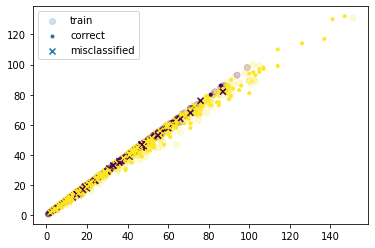

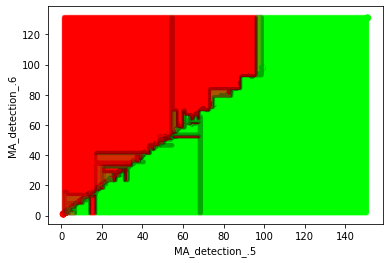

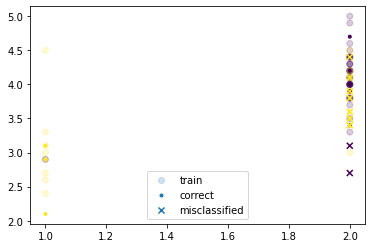

56
40000


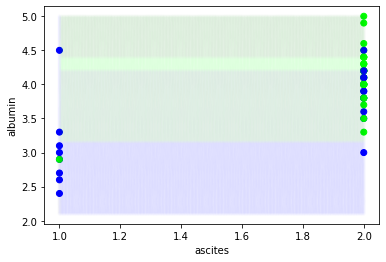

In [ ]:
from IPython.core.display import set_matplotlib_formats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cProfile import label
from scipy.io import arff
from scipy.stats import mode
np.random.seed(1234)

def task1():
    data3 = arff.loadarff('./sample_data/messidor_features.arff')
    data3 = pd.DataFrame(data3[0])
    col_names = ['qual_assess','pre_screen','MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_.8',
            'MA_detection_.9','MA_detection_1.0','exudate_detection_.3','exudate_detection_.4','exudate_detection_.5','exudate_detection_.6'
            ,'exudate_detection_.7','exudate_detection_.8','exudate_detection_.9','exudate_detection_1.0',
            'euc_dist','diam_opt_disc','AM/FM','class_label']
    data3.columns = col_names
    data3.class_label = data3.class_label.apply(lambda x: pd.to_numeric(str(x)[2]))
    data3 = data3.replace({'?' : np.nan}).dropna()
    
    # print(df.corr())
    # print(df)
    # basic statistics df
    # print(df.describe(include='all'))
    # Document messidor features.arff above
    # Document hepatitis below
    df2 = pd.read_csv('./sample_data/hepatitis1.csv', 
    names=["class", "age", "sex", "steroid", "antivirals", 
    "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", 
    "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", 
    "alk_phosphate", "sgot", "albumin", "protime", "histology"])
    df2 = df2.replace({'?': np.nan}).dropna()
    af = df2.select_dtypes(include="object")
    dic = {}
    for i in af:
      df2[i] = df2[i].astype(float, errors = "raise")
    df2.astype(dic).dtypes
    
    # print(df2.corr())
    # print(df2)
    # basic statistics df2
    # print(df2.describe(include='all'))

    # data3 = data3.to_numpy()
    # df2 = df2.to_numpy()
    # print(df[:, 18:]) # taking values that are besides 1 and 0
    # print(df2[:, 16:]) # taking values that are besides 1 and 0
    return data3, df2 # messidor and hep data respectively

class Node:
    def __init__(self,indices,parent):
      self.indices = indices
      self.left = None
      self.right = None
      self.split_feature = None
      self.split_value = None
      if parent:
        self.depth = parent.depth+1
        self.num_classes = parent.num_classes
        self.data = parent.data
        self.labels = parent.labels
        class_probs = np.bincount(self.labels[indices],minlength = self.num_classes)
        self.class_probs = class_probs/np.sum(class_probs)

def greedy_test(node,cost_func):
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances,num_features = node.data.shape
    #sort the features to get the test value candidates 
    #taking avg of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.indices],axis=0)
    test_candidates = (data_sorted[1:]+data_sorted[:-1])/2.
    for f in range(num_features):
      data_f = node.data[node.indices,f]
      for test in test_candidates[:,f]:
          # store the data corresponding to the f-th feature
          left_ind = node.indices[data_f <= test]
          right_ind = node.indices[data_f > test]
          # stop splitting when the child has zero element
          if len(left_ind)==0 or len(right_ind)==0:
              continue
          #compute the left and right cost based on the current split
          left_cost = cost_func(node.labels[left_ind])
          right_cost = cost_func(node.labels[right_ind])
          num_left, num_right = left_ind.shape[0], right_ind.shape[0]
          #the weighted sum of left and right cost
          cost = (num_left*left_cost+num_right*right_cost)/num_instances
          # updates the lowest cost
          if cost<best_cost:
              best_cost = cost
              best_feature = f
              best_value = test
    return best_cost,best_feature,best_value

def cost_misclassification(labels):
    #subtract the maximum prob of any class
    counts = np.bincount(labels)
    class_probs = counts/np.sum(counts)
    return 1-np.max(class_probs)

def cost_entropy(labels):
    #class probabilities
    class_probs = np.bincount(labels)/len(labels)
    class_probs = class_probs[class_probs>0]
    return -np.sum(class_probs*np.log(class_probs))

def cost_gini_index(labels):
    class_probs = np.bincount(labels)/len(labels)
    return 1-np.sum(np.square(class_probs))

class DecisionTree:
    def __init__(self,num_classes=None, max_depth=3,cost_func=cost_misclassification,min_leaf_instances=1):
        self.max_depth = max_depth
        self.root = None
        self.cost_func = cost_func
        self.num_classes = num_classes
        self.min_leaf_instances = min_leaf_instances
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass
    
def fit(self,data,labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels)+1
        # initialize the root
        self.root = Node(np.arange(data.shape[0]),None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth =0
        self._fit_tree(self.root)
        return self

def _fit_tree(self,node):
        # terminate consition : leaf node
        if node.depth == self.max_depth or len(node.indices) <= self.min_leaf_instances:
           return
        #greedy alg to select the best test by minimizing the cost
        cost,split_feature,split_value = greedy_test(node,self.cost_func)
        # inifinity means that not possible to split
        if np.isinf(cost):
          return
        test = node.data[node.indices,split_feature] <= split_value
        #store the split feature and value 
        node.split_feature = split_feature
        node.split_value = split_value

        left = Node(node.indices[test],node)
        right = Node(node.indices[np.logical_not(test)],node)
        #recursively call fit_tree function
        self._fit_tree(left)
        self._fit_tree(right)
        node.left = left
        node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self,data_test):
        class_probs = np.zeros((data_test.shape[0],self.num_classes))
        for n,x in enumerate(data_test):
          node = self.root
          #loop along the depth of the tree where the parent data sample fall in 
          #based on the split
          while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
          class_probs[n,:] = node.class_probs
        return class_probs


# -----------------
# Main code below
# -----------------


def evaluate_acc(self,y_test,y_pred,x_test,x_train):
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    return accuracy
    # print(f'accuracy is {accuracy*100:.1f}.')

    # return accuracy
    # correct = y_test == y_pred
    # incorrect = np.logical_not(correct)
    # plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    # plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    # plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
    # plt.legend()
    # plt.show()




from sklearn import datasets

DecisionTree.predict = predict


mess_data, hep_data = task1()  # get two datasets
    
# mess_data = mess_data.astype(np.float64)
# hep_data = hep_data.astype(np.float64)
Data_x_axis_training_portion = []
Data_y_axis_accuracy = []

# ----------------- data process ----------------------
x = mess_data.drop("class_label",axis = 1).values

# looks like below
# [[ 1.        1.       22.       ...  0.486903  0.100025  1.      ]
#  [ 1.        1.       24.       ...  0.520908  0.144414  0.      ]
#  [ 1.        1.       62.       ...  0.530904  0.128548  0.      ]
#  ...
#  [ 1.        0.       49.       ...  0.560632  0.129843  0.      ]
#  [ 1.        1.       39.       ...  0.485972  0.10669   1.      ]
#  [ 1.        1.        7.       ...  0.556192  0.088957  0.      ]]
x = x[:, [2,3]]
# [[22. 22.]
#  [24. 24.]
#  [62. 60.]
#  ...
#  [49. 48.]
#  [39. 36.]
#  [ 7.  7.]]
y = mess_data['class_label'].values
# [0 0 1 ... 0 1 0]
x_2 = hep_data.drop("class",axis = 1).values
x_2 = x_2[:, [11,16]]
y_2 = hep_data["histology"].values
max_depths = [3,5,8,10,15,20]
max_accuracy = 0
min_leafs = [1,2,3,4,5]
combinations = [(3,1),(3,2),(3,3),(3,4),(3,5),(5,1),(5,2),(5,3),(5,4),(5,5),(8,1),(8,2),(8,3),(8,4),(8,5),(10,1),(10,2),(10,3),(10,4),(10,5),(15,1),(15,2),(15,3),(15,4),(15,5),(20,1),(20,2),(20,3),(20,4),(20,5)]
number_combinations = len(combinations)
cost_function = [cost_gini_index,cost_entropy,cost_misclassification]

# -------------------------------------------------------------------------------------------------------------------------------------------
                            # Cost_functions
# -------------------------------------------------------------------------------------------------------------------------------------------




# -------------------------------------------------------------------------------------------------------------------------------------------
                      # Normal_accuracy with different training set
# -------------------------------------------------------------------------------------------------------------------------------------------

# Train with different train set and get accuracy(compare with test and training set) <- messidor_features datasets
max_accuracys = []
best_combinations = []
for i in range(6,10):
  train_portion = i/10


  num_classes = 3

  num_of_instances = x.shape[0]
  num_of_features = x.shape[1]

  num_train_portion = round(train_portion * num_of_instances)
  # print(num_train_portion,"data used to train")
  shuffle = np.random.RandomState(seed = 1234).permutation(num_of_instances) 
  # Mix all the instances by random to better train the datasets
  # Now split the datasets to train
  x_train, y_train, x_test, y_test = x[shuffle[:num_train_portion]], y[shuffle[:num_train_portion]], x[shuffle[num_train_portion:]], y[shuffle[num_train_portion:]]
  # Now the datasets has been splited
  # below initialize tree object


  # print(len(cost_function))
  for i in range(len(cost_function)):
    max_accuracy = 0
    best_combination = (0,0)
    for j in range(number_combinations):
      tree = DecisionTree(max_depth=combinations[j][0],cost_func=cost_function[i],min_leaf_instances=combinations[j][1])
      # Accuracy with test set
      test = tree.fit(x_train, y_train).predict(x_test)
      y_pred = np.argmax(test,1)
      temp_acc = evaluate_acc(tree, y_test,y_pred,x_test,x_train)
      if temp_acc > max_accuracy:
        max_accuracy = temp_acc
        best_combination = combinations[j]

      # print(max_accuracy,best_combination)
      # Accuracy with train set
      # test = tree.fit(x_train, y_train).predict(x_train)
      # y_pred = np.argmax(test,1)
      # evaluate_acc(tree, y_train,y_pred,x_test,x_train)
      # print("predict with training set")
    max_accuracys.append(max_accuracy)
    best_combinations.append(best_combination)
print(max_accuracys,best_combinations)

# Train with different train set and get accuracy(compare with test and training set) <- hepatitis1 datasets
print("---------------------------------------------")
print("Below are the best combination and best accuracy")
print("---------------------------------------------")
print("Work like this, First array save best accuracy with cost_gini_index, cost_entropy, cost_misclassification on 6/10 training data ")
print("Then the next three are best accuracy with cost_gini_index, cost_entropy, cost_misclassification on 7/10 training data until 9/10")
print("The second array gives best combination corresponds to the best accuracy each cost function have")
print("---------------------------------------------")
max_accuracys = []
best_combinations = []
for i in range(6,10):
  train_portion = i/10


  num_classes = 3

  num_of_instances = x_2.shape[0]
  num_of_features = x_2.shape[1]

  num_train_portion = round(train_portion * num_of_instances)
  # print(num_train_portion,"data used to train")
  shuffle = np.random.RandomState(seed = 1234).permutation(num_of_instances) 
  # Mix all the instances by random to better train the datasets
  # Now split the datasets to train
  x_train_2, y_train_2, x_test_2, y_test_2 = x_2[shuffle[:num_train_portion]], y_2[shuffle[:num_train_portion]], x_2[shuffle[num_train_portion:]], y_2[shuffle[num_train_portion:]]
  # Now the datasets has been splited
  # below initialize tree object
  for i in range(len(cost_function)):
    max_accuracy = 0
    best_combination = (0,0)
    for j in range(number_combinations):
      tree = DecisionTree(max_depth=combinations[j][0],cost_func=cost_function[i],min_leaf_instances=combinations[j][1])
      # Accuracy with test set
      test_2 = tree.fit(x_train_2, y_train_2).predict(x_test_2)
      y_pred_2 = np.argmax(test_2,1)
      temp_acc = evaluate_acc(tree, y_test_2,y_pred_2,x_test_2,x_train_2)
      if temp_acc > max_accuracy:
            max_accuracy = temp_acc
            best_combination = combinations[j]
    max_accuracys.append(max_accuracy)
    best_combinations.append(best_combination)
print(max_accuracys,best_combinations)



  #     print("predict with test set")
  # Accuracy with train set
  # test_2 = tree.fit(x_train_2, y_train_2).predict(x_train_2)
  # y_pred_2 = np.argmax(test_2,1)
  # evaluate_acc(tree, y_train_2,y_pred_2,x_test_2,x_train_2)
  # print("predict with training set")
# print(max_depth,"====================================================================================")






# =========================================================================================================





# Below are the graph generator.
# If generate graph with above function, the graph will be too much, I pick the best combination and best cost function to get best accuracy graph
# For the first data set, I use cost_gini_index and (20, 3) with 6/10 training portion
# This will give me 0.7021739130434783 on the first data set
# For the next data set, I use cost_entropy and (3,5) with 7/10 training portion
train_portion = 6/10
num_classes = np.max(y)+1
num_of_instances = x.shape[0]
num_of_features = x.shape[1]
num_train_portion = round(train_portion * num_of_instances)
# print(num_train_portion,"data used to train")
shuffle = np.random.RandomState(seed = 1234).permutation(num_of_instances) 
# Mix all the instances by random to better train the datasets
# Now split the datasets to train
x_train, y_train, x_test, y_test = x[shuffle[:num_train_portion]], y[shuffle[:num_train_portion]], x[shuffle[num_train_portion:]], y[shuffle[num_train_portion:]]
# Now the datasets has been splited
# below initialize tree object
tree = DecisionTree(num_classes=3, max_depth=20,cost_func=cost_gini_index,min_leaf_instances=3)
test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(test,1)
temp_acc = evaluate_acc(tree, y_test,y_pred,x_test,x_train)
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 1151)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 1151)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T


y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = tree.fit(x_train, y_train).predict(x_all)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('MA_detection_.6')
plt.xlabel('MA_detection_.5')
plt.show()






# Second set
train_portion = 7/10
num_classes = np.max(y_2)+1
num_of_instances = x_2.shape[0]
num_of_features = x_2.shape[1]
num_train_portion = round(train_portion * num_of_instances)
# print(num_train_portion,"data used to train")
shuffle = np.random.RandomState(seed = 1234).permutation(num_of_instances) 
# Mix all the instances by random to better train the datasets
# Now split the datasets to train
x_train_2, y_train_2, x_test_2, y_test_2 = x_2[shuffle[:num_train_portion]], y_2[shuffle[:num_train_portion]], x_2[shuffle[num_train_portion:]], y_2[shuffle[num_train_portion:]]
# Now the datasets has been splited
# below initialize tree object
tree = DecisionTree(num_classes=3,max_depth=3,cost_func=cost_entropy,min_leaf_instances=5)
# Accuracy with test set
test_2 = tree.fit(x_train_2, y_train_2).predict(x_test_2)
y_pred_2 = np.argmax(test_2,1)
temp_acc_2 = evaluate_acc(tree, y_test_2,y_pred_2,x_test_2,x_train_2)

correct_2 = y_test_2 == y_pred_2
incorrect_2 = np.logical_not(correct_2)
plt.scatter(x_train_2[:,0], x_train_2[:,1], c=y_train_2, marker='o', alpha=.2, label='train')
plt.scatter(x_test_2[correct_2,0], x_test_2[correct_2,1], marker='.', c=y_pred_2[correct_2], label='correct')
plt.scatter(x_test_2[incorrect_2,0], x_test_2[incorrect_2,1], marker='x', c=y_test_2[incorrect_2], label='misclassified')
plt.legend()
plt.show()

x0v = np.linspace(np.min(x_2[:,0]), np.max(x_2[:,0]), 200)
x1v = np.linspace(np.min(x_2[:,1]), np.max(x_2[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

 

y_train_prob = np.zeros((y_train_2.shape[0], 3))
y_train_prob[np.arange(y_train_2.shape[0]), y_train_2] = 1
y_prob_all = tree.fit(x_train_2, y_train_2).predict(x_all)
plt.scatter(x_train_2[:,0], x_train_2[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('albumin')
plt.xlabel('ascites')
plt.show()